In [62]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

def calc_and_add_accel(dataframe):
    acceleration = []
    for i in range(dataframe.shape[0]):
        fa = dataframe['frontal accel'][i]
        la = dataframe['lateral accel'][i]
        va = dataframe['vertical accel'][i]

        accel_vector = np.sqrt(fa**2 + la**2 + va**2)
        acceleration.append(accel_vector)

    dataframe['acceleration'] = acceleration
    return dataframe

df_list = []

def add_patient(file, gender, room):
    df = pd.read_csv(file, header=None)
    df.columns = [
        'time',
        'frontal accel',
        'vertical accel',
        'lateral accel',
        'antenna id',
        'rssi',
        'phase',
        'frequency',
        'activity',
    ]
    df['gender'] = gender
    df['room'] = room
    calc_and_add_accel(df)
    df_list.append(df)

for file in sorted(glob.glob('../S1_Dataset/d1p*F')):
    add_patient(file, 0, 1)

for file in sorted(glob.glob('../S1_Dataset/d1p*M')):
    add_patient(file, 1, 1)

for file in sorted(glob.glob('../S2_Dataset/d2p*F')):
    add_patient(file, 0, 2)

for file in sorted(glob.glob('../S2_Dataset/d2p*M')):
    add_patient(file, 1, 2)

df = pd.concat(df_list, axis=0, ignore_index=True)
df.replace({'activity': {1: 0, 2: 0, 3: 0, 4: 1}}, inplace=True)
df

,time,frontal accel,vertical accel,lateral accel,antenna id,rssi,phase,frequency,activity,gender,room,acceleration
0,0.00,0.51826,0.89339,0.134560,4,-56.5,5.83680,921.75,0,0,1,1.041559
1,0.25,0.51826,0.89339,0.134560,3,-68.0,4.84120,925.75,0,0,1,1.041559
2,0.75,0.51826,0.89339,0.134560,4,-55.5,3.64170,924.25,0,0,1,1.041559
3,1.25,0.51826,0.89339,0.134560,3,-57.5,1.77790,924.75,0,0,1,1.041559
4,1.75,0.51826,0.89339,0.134560,4,-61.5,0.24083,922.75,0,0,1,1.041559
...,...,...,...,...,...,...,...,...,...,...,...,...
75123,532.00,0.57689,0.88191,0.134560,3,-62.5,3.76290,922.75,0,1,2,1.062391
75124,532.25,0.57689,0.88191,0.134560,2,-63.5,5.60210,924.75,0,1,2,1.062391
75125,533.50,0.35411,0.96229,0.088944,1,-65.0,0.98175,923.75,0,1,2,1.029226
75126,533.75,0.35411,0.96229,0.088944,3,-60.0,1.46030,922.25,0,1,2,1.029226


In [63]:
import matplotlib.patches as mpatches

colors = {
    0: 'C0',
    1: 'C1',
}

legend = [
    mpatches.Patch(color='C0', label='inactive'),
    mpatches.Patch(color='C1', label='active'),
]

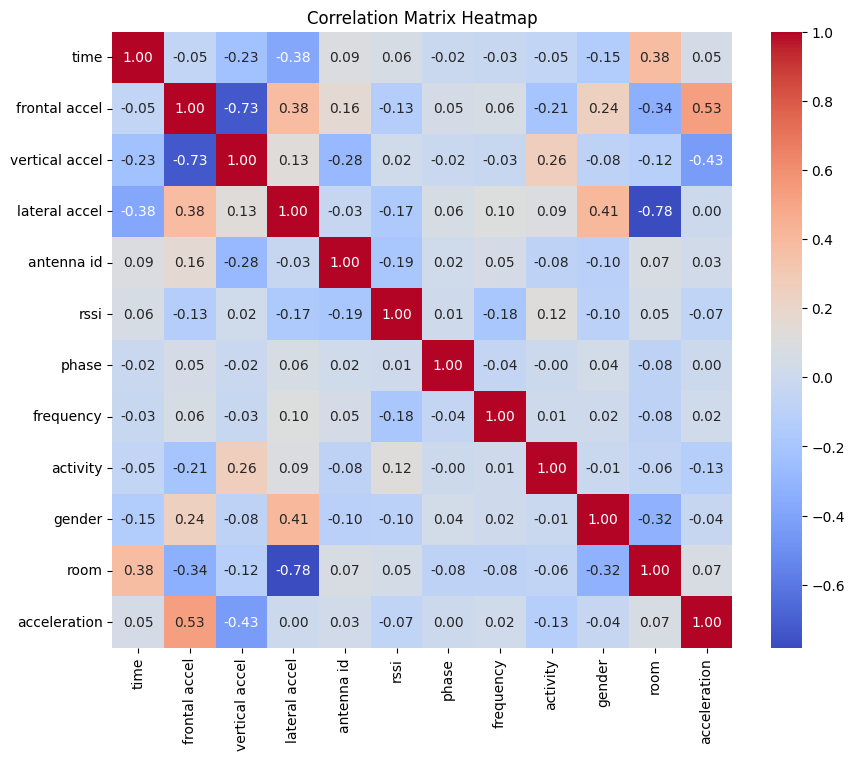

In [64]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Visualize correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

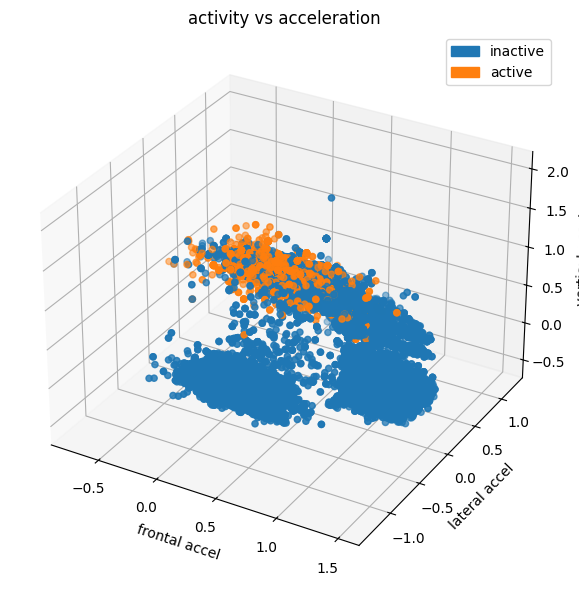

In [70]:
xname = 'frontal accel'
yname = 'lateral accel'
zname = 'vertical accel'
x = df[xname]
y = df[yname]
z = df[zname]
fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, c=df['activity'].map(colors))
ax.set_title(f"activity vs acceleration")
ax.set_xlabel(xname)
ax.set_ylabel(yname)
ax.set_zlabel(zname)
ax.legend(handles=legend)
plt.tight_layout()
plt.show()


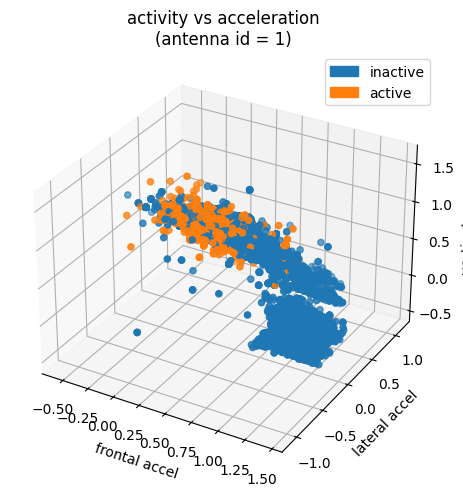

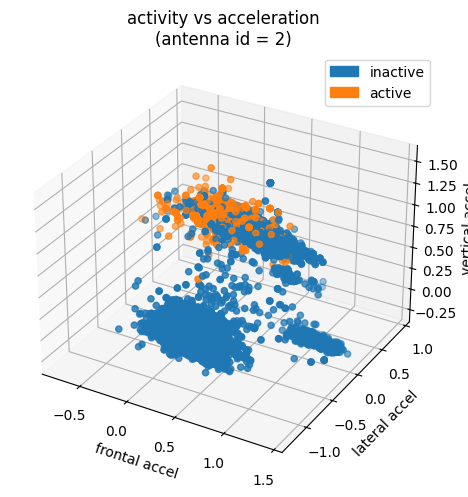

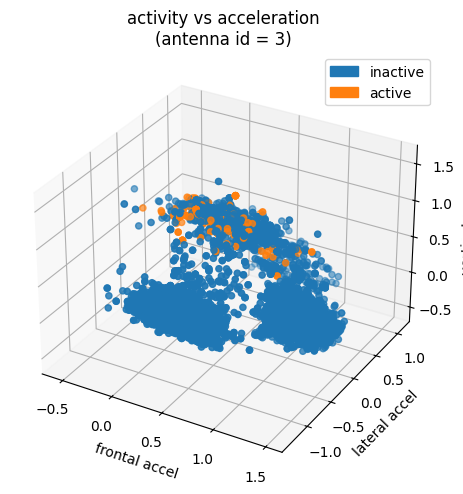

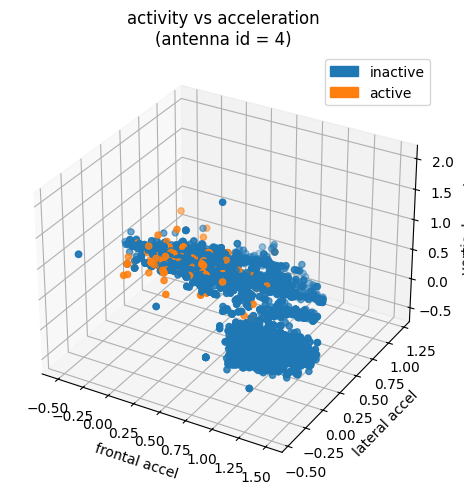

In [66]:
def plot3d_antenna(antenna_id):
    df2 = df.loc[df['antenna id'] == antenna_id]

    xname = 'frontal accel'
    yname = 'lateral accel'
    zname = 'vertical accel'
    x = df2[xname]
    y = df2[yname]
    z = df2[zname]
    fig = plt.figure(figsize=(5, 5))
    ax = plt.axes(projection='3d')
    ax.scatter3D(x, y, z, c=df2['activity'].map(colors))
    plt.title(f"activity vs acceleration\n(antenna id = {antenna_id})")
    ax.set_xlabel(xname)
    ax.set_ylabel(yname)
    ax.set_zlabel(zname)
    ax.legend(handles=legend)
    plt.tight_layout()
    plt.show()

plot3d_antenna(1)
plot3d_antenna(2)
plot3d_antenna(3)
plot3d_antenna(4)

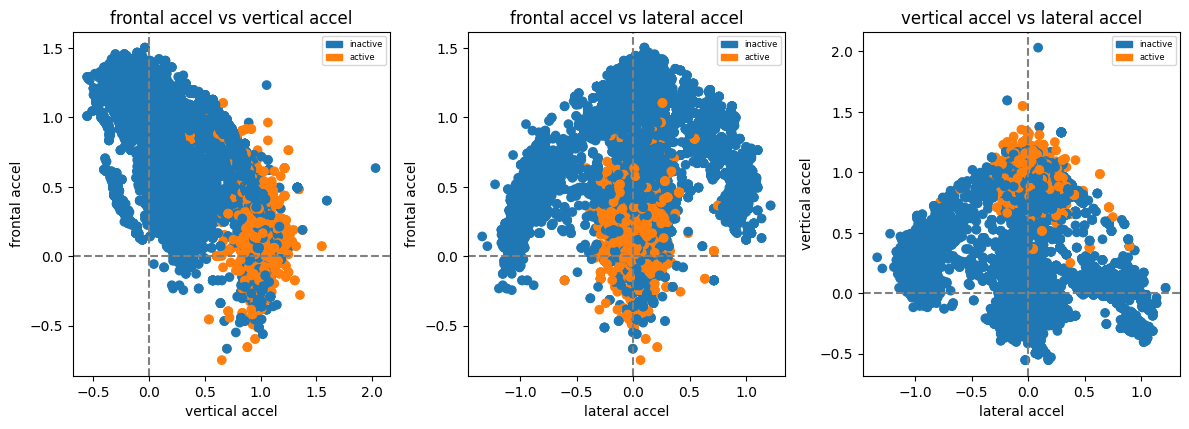

In [67]:
plt.figure(figsize=(12, 12))

# frontal vertical lateral

xname = 'vertical accel'
yname = 'frontal accel'
x = df[xname]
y = df[yname]
plt.subplot(3, 3, 1)
plt.scatter(x, y, c=df['activity'].map(colors))
plt.title(f"{yname} vs {xname}")
plt.xlabel(xname)
plt.ylabel(yname)
plt.legend(handles=legend, fontsize=6)
plt.axhline(y=0, color='gray', linestyle='--')
plt.axvline(x=0, color='gray', linestyle='--')

xname = 'lateral accel'
yname = 'frontal accel'
x = df[xname]
y = df[yname]
plt.subplot(3, 3, 2)
plt.scatter(x, y, c=df['activity'].map(colors))
plt.title(f"{yname} vs {xname}")
plt.xlabel(xname)
plt.ylabel(yname)
plt.legend(handles=legend, fontsize=6)
plt.axhline(y=0, color='gray', linestyle='--')
plt.axvline(x=0, color='gray', linestyle='--')

xname = 'lateral accel'
yname = 'vertical accel'
x = df[xname]
y = df[yname]
plt.subplot(3, 3, 3)
plt.scatter(x, y, c=df['activity'].map(colors))
plt.title(f"{yname} vs {xname}")
plt.xlabel(xname)
plt.ylabel(yname)
plt.legend(handles=legend, fontsize=6)
plt.axhline(y=0, color='gray', linestyle='--')
plt.axvline(x=0, color='gray', linestyle='--')

plt.tight_layout()
plt.show()